# DATA2001 Practical Assignment: Bushfire Risk Analysis

**Group Name:**
F16 - 33

**Group Members:**
1. Lavender Li 500034343 shli5792
2. Yuxuan Xiao 500371097 yxia8543

## Task 1: Data Integration and Database Generation

**connect with database**

In [1]:
from sqlalchemy import create_engine
import psycopg2
import psycopg2.extras
import json
import os
import pandas as pd

data_path = "."
def pgconnect(credential_filepath, db_schema="public"):
    with open(credential_filepath) as f:
        db_conn_dict = json.load(f)
        HOST       = db_conn_dict['host']
        DB_USER    = db_conn_dict['user']
        DB_PW      = db_conn_dict['password']
        DEFAULT_DB = db_conn_dict['user']
        conn = None
        try:
            db = create_engine('postgresql+psycopg2://'+DB_USER+':'+DB_PW+'@'+HOST+'/'+DEFAULT_DB, echo=False)
            conn = db.connect()
            print('connected')
        except Exception as e:
            print("unable to connect to the database")
            print(e)
        return db,conn
credfilepath = os.path.join(data_path, "data2x01_db.json")
db,conn = pgconnect(credfilepath)
data_path = globals()['_dh'][0]

connected


**import "StatisticalAreas.csv" file**

In [9]:
conn.execute("DROP TABLE IF EXISTS statisticalareas")
statisticalareas_schema = """CREATE TABLE IF NOT EXISTS statisticalareas (
                         area_id        INT PRIMARY KEY,
                         area_name      TEXT,
                         parent_area_id INT
                   )"""
loaded_sa = pd.read_csv(os.path.join(data_path, 'StatisticalAreas.csv'))
loaded_sa = loaded_sa.drop_duplicates(subset=['area_id'])
conn.execute(statisticalareas_schema)
for index, row in loaded_sa.iterrows():
    placeholder_sa = ",".join(["%s"]*len(row))
    insert_content_sa = "INSERT INTO statisticalareas VALUES ( {} )".format(placeholder_sa)
    conn.execute(insert_content_sa,list(row))
    
print("successfully")


successfully


**import "Neighbourhoods.csv" file**

In [21]:
neighbourhoods_schema = """CREATE TABLE IF NOT EXISTS neighbourhoods (
                         area_id                        INT PRIMARY KEY,
                         area_name                      TEXT,
                         land_area                      FLOAT,
                         population                     TEXT,
                         dwellings                      TEXT,
                         usinesses                      INT,
                         median_income                  INT,
                         avg_monthly_rent               INT
        
                   )"""

loaded_ne_data = pd.read_csv(os.path.join(data_path,"Neighbourhoods.csv"))
loaded_ne_data = loaded_ne_data.drop_duplicates(subset=['area_id'])
cleaned_df = loaded_ne_data.fillna(0)
conn.execute("DROP TABLE IF EXISTS neighbourhoods")
conn.execute(neighbourhoods_schema)

for index,row in cleaned_df.iterrows():
    placeholders = ",".join(["%s"]*len(row))
    insert_stmt = "INSERT INTO neighbourhoods VALUES ( {} )".format(placeholders)
    conn.execute(insert_stmt,list(row))

print("success")

success


**import "BusinessStats.csv" file**

In [5]:
conn.execute("DROP TABLE IF EXISTS businessstats")
businessstats_schema = """CREATE TABLE IF NOT EXISTS businessstats (
                         area_id         INT PRIMARY KEY,
                         area_name         VARCHAR(50),
                         number_of_businesses      INT,
                         accommodation_and_food_services   INT,
                         retail_trade   INT,
                         agriculture_forestry_and_fishing INT,
                         health_care_and_social_assistance INT,
                         public_administration_and_safety INT,
                         transport_postal_and_warehousing INT
                   )"""
conn.execute(businessstats_schema)
loaded_bu = pd.read_csv(os.path.join(data_path, 'BusinessStats.csv'))
loaded_bu = loaded_bu.drop_duplicates(subset=['area_id'])
conn.execute(businessstats_schema)
for index, row in loaded_bu.iterrows():
    placeholder_bu = ",".join(["%s"]*len(row))
    insert_content_bu = "INSERT INTO businessstats VALUES ( {} )".format(placeholder_bu)
    conn.execute(insert_content_bu,list(row))
print("success")

success


**import "SA2 2016 AUST.shp" file**

In [2]:
import geopandas as gpd

statistical_areas = gpd.read_file( os.path.join(data_path, "SA2_2016_AUST.shp") )

sa2_areas_schema = '''CREATE TABLE  sa2_2016_aust (
                     sa2_main16 INT,
                     sa2_5digit16 INT,
                     sa2_name16  TEXT,
                     sa3_code INT,
                     sa3_name TEXT,
                     sa4_code TEXT,
                     sa4_name TEXT,
                     gcc_code TEXT,
                     gcc_name TEXT,
                     ste_code INT,
                     ste_name TEXT,
                     areaqkm16 NUMERIC,
                     geom GEOMETRY(MULTIPOLYGON, 4283),
                     CONSTRAINT fk_area_id
                     FOREIGN KEY(sa2_main16) 
                     REFERENCES neighbourhoods(area_id))
                     ''' 

conn.execute("DROP TABLE IF EXISTS sa2_statistical_areas")
conn.execute(sa2_areas_schema)

for index,row in statistical_areas.iterrows():
    if None in list(row):
        continue
    placeholders = ",".join(["%s"]*(len(row)-1))
    geom_col_placeholder =  "ST_Multi(ST_GeomFromText(%s, 4283))"
    insert_stmt = "INSERT INTO sa2_2016_aust VALUES ( {},{} );".format(placeholders,geom_col_placeholder)
    try:
        conn.execute(insert_stmt,list(row[:-1])+[row[-1].wkt])
    except:
        pass
    print("success")

success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success
success


**add gid column into "sa2_2016_aust" table**

In [14]:
conn.execute("ALTER TABLE sa2_2016_aust ADD COLUMN gid SERIAL;")

**add normal index in tables**

In [17]:
index_name = "neighbourhoods_number_of_population_index"
table_name = "neighbourhoods"
column_name = "population"

conn.execute('CREATE INDEX {} ON {} ({})'.format(index_name,table_name,column_name))

In [10]:
index_name = "neighbourhoods_number_of_dwellings_index"
table_name = "neighbourhoods"
column_name = "dwellings" 

conn.execute('CREATE INDEX {} ON {} ({})'.format(index_name,table_name,column_name))

In [23]:
index_name = "businessstats_number_of_businesses_index"
table_name = "businessstats"
column_name = "number_of_businesses"

conn.execute('CREATE INDEX {} ON {} ({})'.format(index_name,table_name,column_name))

In [24]:
index_name = "businessstats_health_care_and_social_assistance_index"
table_name = "businessstats"
column_name = "health_care_and_social_assistance" 

conn.execute('CREATE INDEX {} ON {} ({})'.format(index_name,table_name,column_name))

In [22]:
index_name = "neighbourhoods_id_index"
table_name = "neighbourhoods"
column_name = "area_id"

conn.execute('CREATE INDEX {} ON {} ({})'.format(index_name,table_name,column_name))

In [25]:
index_name = "rfsnsw_bfpl_area_index"
table_name = "rfsnsw_bfpl"
column_name = "shape_area"

conn.execute('CREATE INDEX {} ON {} ({})'.format(index_name,table_name,column_name))

In [26]:
index_name = "rfsnsw_bfpl_category_index"
table_name = "rfsnsw_bfpl"
column_name = "category"

conn.execute('CREATE INDEX {} ON {} ({})'.format(index_name,table_name,column_name))

**add spatial index in "geom" column**

In [15]:
index_name = "sa2_geom_index"
table_name = "sa2_2016_aust"
column_name = "geom"

conn.execute('CREATE INDEX {} ON {} USING gist ({})'.format(index_name,table_name,column_name))

In [27]:
index_name = "neighbourhoods_geom_index"
table_name = "neighbourhoods"
column_name = "geom"

conn.execute('CREATE INDEX {} ON {} USING gist ({})'.format(index_name,table_name,column_name))

In [28]:
index_name = "rfsnsw_bfpl_geom_index"
table_name = "rfsnsw_bfpl"
column_name = "geom"

conn.execute('CREATE INDEX {} ON {} USING gist ({})'.format(index_name,table_name,column_name))

**add foreign key in "sa2_2016_aust" table**

In [16]:
fk_name = "area_id_fk"
referencing_table_name = "neighbourhoods"
table_name = "sa2_2016_aust"
column_name1 = "area_id"
column_name2 = "sa2_main16"

conn.execute('ALTER TABLE {} ADD CONSTRAINT {} FOREIGN KEY ({})  REFERENCES {}({})'.format(table_name,fk_name,column_name2,referencing_table_name,column_name1)) 

In [12]:
for table_name in db.table_names():
  conn.execute("GRANT all ON {} TO y21s1d2x01_yxia8543".format(table_name))

<ipython-input-12-a391b5b05483>:1: SADeprecationWarning: The Engine.table_names() method is deprecated and will be removed in a future release.  Please refer to Inspector.get_table_names(). (deprecated since: 1.4)
  for table_name in db.table_names():


 ## Task 2: Fire Risk Analysis

**three method:**  
1. z_score: use to calculate z-score  
2. sigmoid: use to calculate sigmoid  
3. fire_risk: use to calculate the each neighbourhoods fire risk

In [5]:
import statistics
import numpy as np

def z_score(measure):
    return (measure-np.mean(measure))/np.std(measure)
            
def sigmoid(x):
    return (1/(1+np.exp(-x)))

# def fire_risk(pop_density, dwelling_density, business_density, bfpl_density, assistive_service_density):
    
def fire_risk(population_density, dwelling_density, business_density, bfpl_density, assistive_service_density):
    result = sigmoid(z_score(population_density)+z_score(dwelling_density)+z_score(business_density)+z_score(bfpl_density)-z_score(assistive_service_density))
#     result = sigmoid(z_score(population_density)+z_score(dwelling_density)+z_score(business_density)-z_score(assistive_service_density))
    return result

In [6]:
def pgquery( conn, sqlcmd, args=None, silent=False ):
    """ utility function to execute some SQL query statement
    can take optional arguments to fill in (dictionary)
    will print out on screen the result set of the query
    error and transaction handling built-in """
    retdf = pd.DataFrame()
    retval = False
    try:
        if args is None:
            retdf = pd.read_sql_query(sqlcmd,conn)
        else:
            retdf = pd.read_sql_query(sqlcmd,conn,params=args)
        if silent == False:
            print(retdf.shape)
            print(retdf.to_string())
        retval = True
    except Exception as e:
        if silent == False:
            print("db read error: ")
            print(e)
    return retval,retdf

**join table "neighbourhoods" in table "sa2_2016_aust"**  
**calculate population_density and dwellings_density**

In [7]:
data = pd.read_sql_query("""
        SELECT N.area_id, N.area_name, N.population, N.dwellings, S.areasqkm16, N.population/S.areasqkm16 AS "population_density", N.dwellings/S.areasqkm16 AS "dwellings_density"
        FROM neighbourhoods AS N LEFT JOIN sa2_2016_aust AS S on (N.area_id = S.sa2_main16)
        ORDER BY N.area_id
        """, conn)
print(data)
population_density = data['population_density']
dwelling_density = data['dwellings_density']
print(population_density)
print(dwelling_density)

       area_id                    area_name  population  dwellings  \
0    101051540              Goulburn Region       12670       6817   
1    102011028     Avoca Beach - Copacabana        7590       2325   
2    102011029  Box Head - MacMasters Beach       10986       3847   
3    102011030              Calga - Kulnura        4841       1575   
4    102011031          Erina - Green Point       14237       4450   
..         ...                          ...         ...        ...   
317  128021537          Royal National Park          28          4   
318  128021538        Sutherland - Kirrawee       21760       6924   
319  128021607                     Engadine       17424       5219   
320  128021608         Loftus - Yarrawarrah        7426       2177   
321  128021609             Woronora Heights        3681       1050   

     areasqkm16  population_density  dwellings_density  
0     9035.1221            1.402305           0.754500  
1        6.4376         1179.010811         3

**join table "neighbourhoods" in table "businessstats" and table "sa2_2016_aust"**  
**calculate business_density and assistive_service_density**

In [31]:
data = pd.read_sql_query("""
        SELECT B.area_id, N.area_name, S.areasqkm16, B.number_of_businesses, B.health_care_and_social_assistance, B.number_of_businesses/S.areasqkm16 AS "business_density", B.health_care_and_social_assistance/S.areasqkm16 AS "assistive_service_density"
        FROM neighbourhoods AS N INNER JOIN businessstats AS B on (B.area_id = N.area_id) LEFT JOIN sa2_2016_aust AS S on (N.area_id = S.sa2_main16)
        ORDER BY N.area_id
        """, conn)
print(data)
business_density = data['business_density']
assistive_service_density = data['assistive_service_density']
print(business_density)
print(assistive_service_density)

       area_id                    area_name  areasqkm16  number_of_businesses  \
0    101051540              Goulburn Region   9035.1221                  1891   
1    102011028     Avoca Beach - Copacabana      6.4376                   724   
2    102011029  Box Head - MacMasters Beach     32.0860                   934   
3    102011030              Calga - Kulnura    767.9512                  1134   
4    102011031          Erina - Green Point     33.7934                  1712   
..         ...                          ...         ...                   ...   
317  128021537          Royal National Park    139.3336                     3   
318  128021538        Sutherland - Kirrawee      7.7547                  2136   
319  128021607                     Engadine      8.9538                  1106   
320  128021608         Loftus - Yarrawarrah      3.8436                   452   
321  128021609             Woronora Heights      3.1374                   265   

     health_care_and_social

**spatial join "neighbourhoods" table in "rfsnsw_bfpl" table and then join in "sa2_2016_aust" table**  
**calculate bfpl_density**

In [32]:
data = pd.read_sql_query("""
       select table_sum.area_id,table_sum.bfpl_total/S.areasqkm16 as "bfpl_density"
       from   (select 
                    N.area_id,
                    sum(sum_table.bfpl_sum*sum_table.category) AS "bfpl_total" from 
                    neighbourhoods AS N INNER JOIN (SELECT 
                            N.area_id,
                            N.area_name,
                            N.land_area,      
                            SUM(R.shape_area) AS "bfpl_sum",
                            CASE 
                               WHEN R.category = '1.0'   THEN 0.6
                               WHEN R.category = '2.0'  THEN 0.1
                               WHEN R.category = '3.0'    THEN 0.3
                               ELSE null
                            END as "category"
                        FROM neighbourhoods N LEFT JOIN rfsnsw_bfpl R ON (ST_contains (N.geom, R.geom)) 
                        GROUP BY N.area_id,R.category
                        ORDER BY N.area_id,R.category) AS sum_table on (sum_table.area_id = N.area_id)
                    GROUP BY N.area_id
                    ORDER BY N.area_id) AS table_sum LEFT JOIN sa2_2016_aust AS S on (table_sum.area_id = S.sa2_main16)
        ORDER BY table_sum.area_id
        """, conn)
        
print(data)
bfpl_density = data['bfpl_density']
print(bfpl_density)

       area_id  bfpl_density
0    101051540  1.433176e-05
1    102011028  7.942971e-06
2    102011029  3.691752e-05
3    102011030  9.061160e-06
4    102011031  5.225507e-06
..         ...           ...
317  128021537  5.740781e-05
318  128021538  6.332021e-08
319  128021607  3.583658e-07
320  128021608  6.738740e-07
321  128021609  2.119204e-04

[322 rows x 2 columns]
0      1.433176e-05
1      7.942971e-06
2      3.691752e-05
3      9.061160e-06
4      5.225507e-06
           ...     
317    5.740781e-05
318    6.332021e-08
319    3.583658e-07
320    6.738740e-07
321    2.119204e-04
Name: bfpl_density, Length: 322, dtype: float64


**calcuate final fire risk using method created before**  
**save fire risk result in new table**

In [14]:
newfile = fire_risk(population_density, dwelling_density, business_density, bfpl_density, assistive_service_density)
newfile = newfile.to_frame()
print(type(newfile))
newfile.columns=["risk"]
newfile = newfile.fillna(0)
neighbourhoods = pd.read_sql_query("""SELECT * FROM neighbourhoods ORDER BY area_id""", conn)
newfile["area_id"]=neighbourhoods["area_id"]
newfile["geom"]=neighbourhoods["geom"]
newfile["median_income"]=neighbourhoods["median_income"]
newfile["avg_monthly_rent"]=neighbourhoods["avg_monthly_rent"]
newfile.to_sql("fire_risk", con=conn, if_exists='replace')
print("success")

<class 'pandas.core.frame.DataFrame'>
success


**Data visulisation about all neighbourhoods in Greater Sydney**

<AxesSubplot:>

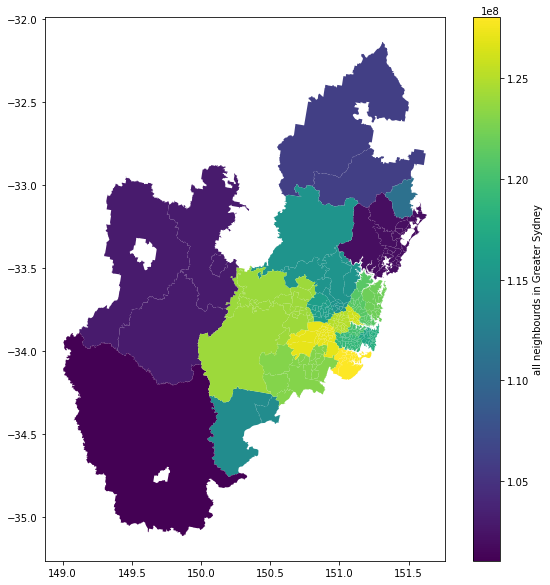

In [2]:
from shapely import wkt
import matplotlib as mpl
import matplotlib.pyplot as plt
import geopandas as gpd
query = """
        SELECT N,area_id,S.geom from neighbourhoods as N left join sa2_2016_aust as S on (N.area_id=S.sa2_main16) 
        """
nsw = gpd.GeoDataFrame.from_postgis(query, conn, geom_col='geom')

nsw.plot(column='area_id',
        legend=True,
        figsize=(10,10),
        legend_kwds={'label': "all neighbourds in Greater Sydney",
        'orientation': "vertical"})

**Data visulisation about all neighbourhoods in NSW**

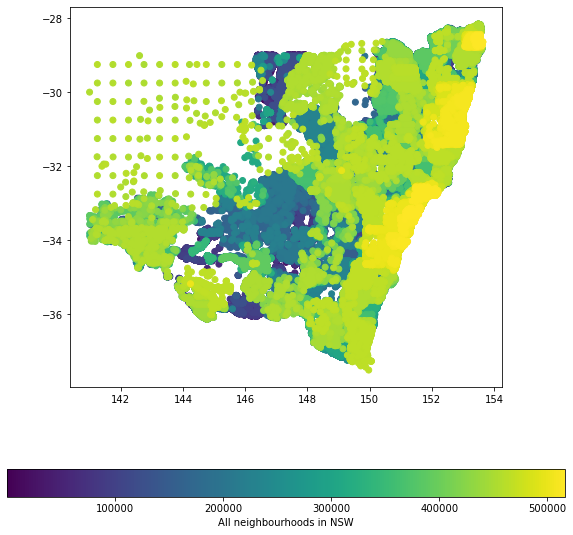

In [5]:
from shapely import wkt
import matplotlib as mpl
import matplotlib.pyplot as plt
import geopandas as gpd
query = """
        SELECT gid,geom from rfsnsw_bfpl
        """
nsw = gpd.GeoDataFrame.from_postgis(query, conn, geom_col='geom')

nsw.plot(column='gid',
        legend=True,
        figsize=(10,10),
        legend_kwds={'label': "All neighbourhoods in NSW",
         'orientation': "horizontal"})
plt.show()

**Data visulisation about Sydney map which is interactive**

In [1]:
import folium
import pandas as pd
latitude = -33.8626
longitude = 151.209
san_map = folium.Map(location=[latitude, longitude], zoom_start=12)
san_map

**Data visualisation about each neighbourhoods fire risk in Greater Sydney**

<AxesSubplot:>

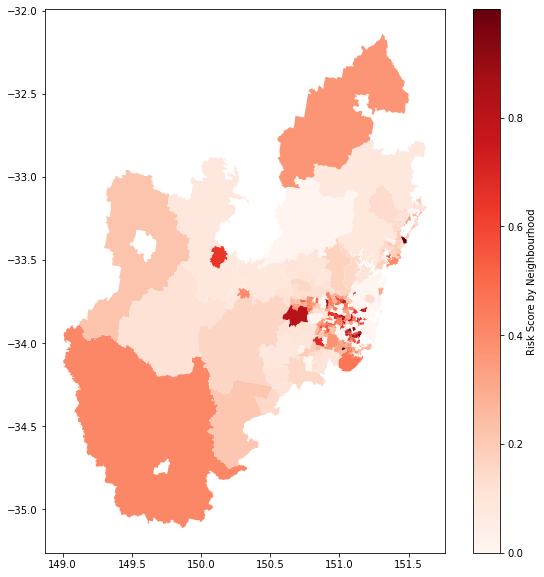

In [6]:
from shapely import wkt
import matplotlib as mpl
import matplotlib.pyplot as plt
import geopandas as gpd
query = """
        SELECT risk,geom from fire_risk
        """
nsw = gpd.GeoDataFrame.from_postgis(query, conn, geom_col='geom')

nsw.plot(column='risk',
        cmap='Reds',
        legend=True,
        figsize=(10,10),
        legend_kwds={'label': "Risk Score by Neighbourhood",
         'orientation': "vertical"})

**Data visualisation about fire risk situation in Greater Sydeny in whole NSW**

<AxesSubplot:>

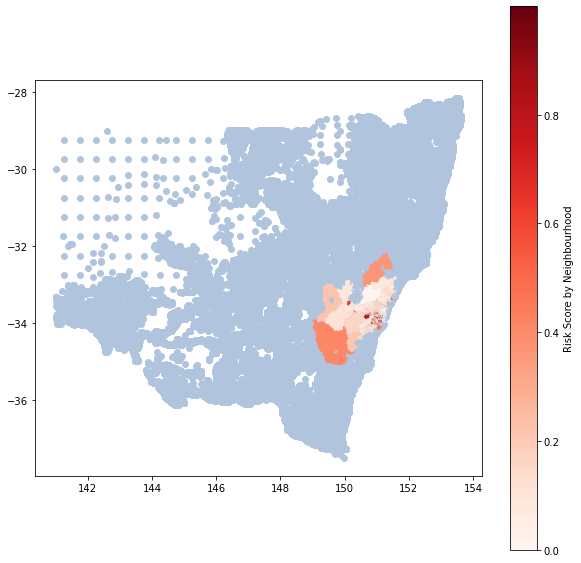

In [10]:
from shapely import wkt
import matplotlib as mpl
import matplotlib.pyplot as plt
import geopandas as gpd

fig, ax = plt.subplots(1, figsize=(10,10))
query = """
        SELECT gid,geom from rfsnsw_bfpl
        """
nsw = gpd.GeoDataFrame.from_postgis(query, conn, geom_col='geom')

nsw.plot(color = 'lightsteelblue',
        ax=ax,
        legend=True,
        figsize=(10,10),
        legend_kwds={'label': "All neighbours in NSW",
         'orientation': "horizontal"})

query = """
        SELECT risk,geom from fire_risk
        """
nsw = gpd.GeoDataFrame.from_postgis(query, conn, geom_col='geom')
nsw.plot(column='risk',
        cmap='Reds',
        ax=ax,
        legend=True,
        figsize=(10,10),
        legend_kwds={'label': "Risk Score by Neighbourhood",
         'orientation': "vertical"})

## Task 3:  Correlation between fire risk and the median income and rent of a neighbourhood  

**show mean and standard deviation value**  
**show scatter plot**

risk: mean=0.231 stdv=0.266
median_income: mean=49017.109 stdv=11585.440
avg_monthly_rent: mean=1849.932 stdv=602.635


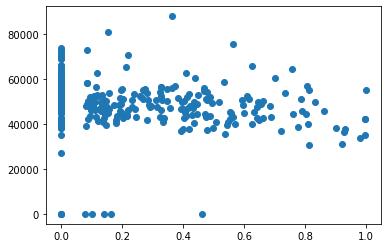

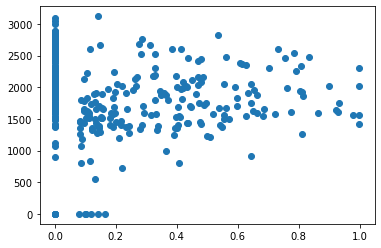

In [15]:
from numpy import mean
from numpy import std
from numpy.random import randn
from numpy.random import seed
from matplotlib import pyplot
import pandas as pd

need_data = pd.read_sql_query("""SELECT * FROM fire_risk ORDER BY area_id""", conn)

data1 = need_data['risk']
data2 = need_data['median_income']
data3 = need_data['avg_monthly_rent']

print('risk: mean=%.3f stdv=%.3f' % (mean(data1), std(data1)))
print('median_income: mean=%.3f stdv=%.3f' % (mean(data2), std(data2)))
print('avg_monthly_rent: mean=%.3f stdv=%.3f' % (mean(data3), std(data3)))

pyplot.scatter(data1, data2)
pyplot.show()
pyplot.scatter(data1, data3)
pyplot.show()


**show covariance**

In [17]:
from numpy import cov
covariance = cov(data1, data2)
print(covariance)

covariance1 = cov(data1, data3)
print(covariance1)

[[ 7.10381377e-02 -5.22445928e+02]
 [-5.22445928e+02  1.34640565e+08]]
[[ 7.10381377e-02 -9.97793889e+00]
 [-9.97793889e+00  3.64300369e+05]]


**using Pearsons method to calculate correlation and p-value**

In [18]:
from scipy.stats import pearsonr
corr, p_value = pearsonr(data1, data2)
print('fire risk and median_income Pearsons correlation: %.3f' % corr)
print('fire risk and median_income Pearsons p-value: %.3f' % p_value)

corr1, p_value = pearsonr(data1, data3)
print('fire risk and avg_monthly_rent Pearsons correlation: %.3f' % corr1)
print('fire risk and avg_monthly_rent Pearsons p-value: %.3f' % p_value)

fire risk and median_income Pearsons correlation: -0.169
fire risk and median_income Pearsons p-value: 0.002
fire risk and avg_monthly_rent Pearsons correlation: -0.062
fire risk and avg_monthly_rent Pearsons p-value: 0.267


**using Spearmans method to calculate correlation and p-value**

In [23]:
from scipy.stats import spearmanr
corr, p_value = spearmanr(data1, data2)
print('fire risk and median_income Spearmans correlation: %.3f' % corr)
print('fire risk and median_income Spearmans p-value: ' + str(p_value))

corr1, p_value = spearmanr(data1, data3)
print('fire risk and avg_monthly_rent Spearmans correlation: %.3f' % corr1)
print('fire risk and avg_monthly_rent Spearmans p-value: ' + str(p_value))

fire risk and median_income Spearmans correlation: -0.278
fire risk and median_income Spearmans p-value: 4.0554913668676157e-07
fire risk and avg_monthly_rent Spearmans correlation: -0.210
fire risk and avg_monthly_rent Spearmans p-value: 0.00015118764242690868


**using kendall method to calculate correlation and p-value**

In [13]:
need_data.corr("kendall")

,index,risk,area_id,median_income,avg_monthly_rent
index,1.000000,0.063177,1.000000,-0.021639,0.033796
risk,0.063177,1.000000,0.063177,-0.201948,-0.136019
area_id,1.000000,0.063177,1.000000,-0.021639,0.033796
median_income,-0.021639,-0.201948,-0.021639,1.000000,0.450129
avg_monthly_rent,0.033796,-0.136019,0.033796,0.450129,1.000000


## Add our own dataset and then repeated task2 and 3

In [51]:
data = pd.read_sql_query( """
       SELECT area_id,shape/S.areasqkm16 as "lake_density" FROM 
            (SELECT 
                N.area_id,
                N.area_name,
                N.land_area,      
                SUM(L.shape_area) as "shape"
            FROM neighbourhoods AS N LEFT JOIN lakes AS L ON (ST_contains (N.geom, L.geom)) 
            GROUP BY N.area_id
            ORDER BY N.area_id) AS new_shap_data  LEFT JOIN sa2_2016_aust AS S on (new_shap_data.area_id = S.sa2_main16)
        ORDER BY area_id
        """,conn)
data=data.fillna(0)
print(data)
lake_density = data['lake_density']
print(lake_density)

       area_id  lake_density
0    101051540  0.000000e+00
1    102011028  0.000000e+00
2    102011029  0.000000e+00
3    102011030  0.000000e+00
4    102011031  0.000000e+00
..         ...           ...
317  128021537  6.422069e-08
318  128021538  0.000000e+00
319  128021607  0.000000e+00
320  128021608  0.000000e+00
321  128021609  0.000000e+00

[322 rows x 2 columns]
0      0.000000e+00
1      0.000000e+00
2      0.000000e+00
3      0.000000e+00
4      0.000000e+00
           ...     
317    6.422069e-08
318    0.000000e+00
319    0.000000e+00
320    0.000000e+00
321    0.000000e+00
Name: lake_density, Length: 322, dtype: float64


In [14]:
def fire_risk(population_density, dwelling_density, business_density, bfpl_density, assistive_service_density,lake_density):
    result = sigmoid(z_score(population_density)+z_score(dwelling_density)+z_score(business_density)+z_score(bfpl_density)-z_score(assistive_service_density)-z_score(lake_density))
    return result

In [55]:
newfile1 = fire_risk(population_density, dwelling_density, business_density, bfpl_density, assistive_service_density,lake_density)
newfile1 = newfile1.to_frame()
print(type(newfile1))
newfile1.columns=["risk"]
newfile1 = newfile.fillna(0)
neighbourhoods = pd.read_sql_query("""SELECT * FROM neighbourhoods ORDER BY area_id""", conn)
newfile1["area_id"]=neighbourhoods["area_id"]
newfile1["geom"]=neighbourhoods["geom"]
newfile1["median_income"]=neighbourhoods["median_income"]
newfile1["avg_monthly_rent"]=neighbourhoods["avg_monthly_rent"]
newfile1.to_sql("fire_risk_full", con=conn, if_exists='replace')
print("success")

<class 'pandas.core.frame.DataFrame'>
success


<AxesSubplot:>

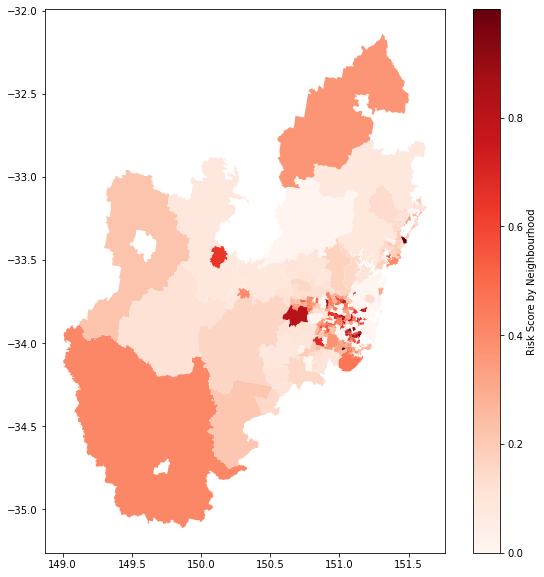

In [56]:
from shapely import wkt
import matplotlib as mpl
import matplotlib.pyplot as plt
import geopandas as gpd
query = """
        SELECT risk,geom from fire_risk_full
        """
nsw = gpd.GeoDataFrame.from_postgis(query, conn, geom_col='geom')

nsw.plot(column='risk',
        cmap='Reds',
        legend=True,
        figsize=(10,10),
        legend_kwds={'label': "Risk Score by Neighbourhood",
         'orientation': "vertical"})

risk: mean=0.231 stdv=0.266
median_income: mean=49017.109 stdv=11585.440
avg_monthly_rent: mean=1849.932 stdv=602.635


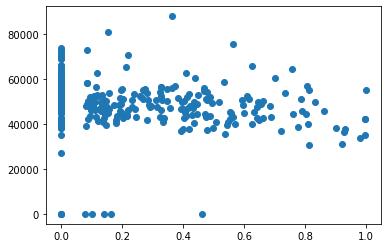

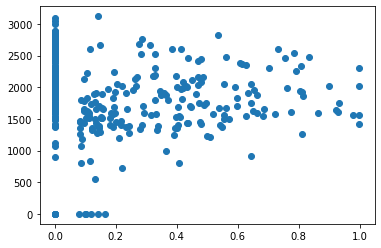

In [24]:
from numpy import mean
from numpy import std
from numpy.random import randn
from numpy.random import seed
from matplotlib import pyplot
import pandas as pd

need_data = pd.read_sql_query("""SELECT * FROM fire_risk_full ORDER BY area_id""", conn)

data1 = need_data['risk']
data2 = need_data['median_income']
data3 = need_data['avg_monthly_rent']

print('risk: mean=%.3f stdv=%.3f' % (mean(data1), std(data1)))
print('median_income: mean=%.3f stdv=%.3f' % (mean(data2), std(data2)))
print('avg_monthly_rent: mean=%.3f stdv=%.3f' % (mean(data3), std(data3)))

pyplot.scatter(data1, data2)
pyplot.show()
pyplot.scatter(data1, data3)
pyplot.show()


In [59]:
from numpy import cov
covariance = cov(data1, data2)
print(covariance)

covariance1 = cov(data1, data3)
print(covariance1)

[[ 7.10381377e-02 -5.22445928e+02]
 [-5.22445928e+02  1.34640565e+08]]
[[ 7.10381377e-02 -9.97793889e+00]
 [-9.97793889e+00  3.64300369e+05]]


In [25]:
need_data.corr('kendall')

,index,risk,area_id,median_income,avg_monthly_rent
index,1.000000,0.063177,1.000000,-0.021639,0.033796
risk,0.063177,1.000000,0.063177,-0.201948,-0.136019
area_id,1.000000,0.063177,1.000000,-0.021639,0.033796
median_income,-0.021639,-0.201948,-0.021639,1.000000,0.450129
avg_monthly_rent,0.033796,-0.136019,0.033796,0.450129,1.000000


In [26]:
from scipy.stats import pearsonr
corr, p_value = pearsonr(data1, data2)
print('fire risk and median_income Pearsons correlation: %.3f' % corr)
print('fire risk and median_income Pearsons p-value: %.3f' % p_value)

corr1, p_value = pearsonr(data1, data3)
print('fire risk and avg_monthly_rent Pearsons correlation: %.3f' % corr1)
print('fire risk and avg_monthly_rent Pearsons p-value: %.3f' % p_value)

fire risk and median_income Pearsons correlation: -0.169
fire risk and median_income Pearsons p-value: 0.002
fire risk and avg_monthly_rent Pearsons correlation: -0.062
fire risk and avg_monthly_rent Pearsons p-value: 0.267


In [27]:
from scipy.stats import spearmanr
corr, p_value = spearmanr(data1, data2)
print('fire risk and median_income Spearmans correlation: %.3f' % corr)
print('fire risk and median_income Spearmans p-value: ' + str(p_value))

corr1, p_value = spearmanr(data1, data3)
print('fire risk and avg_monthly_rent Spearmans correlation: %.3f' % corr1)
print('fire risk and avg_monthly_rent Spearmans p-value: ' + str(p_value))

fire risk and median_income Spearmans correlation: -0.278
fire risk and median_income Spearmans p-value: 4.0554913668676157e-07
fire risk and avg_monthly_rent Spearmans correlation: -0.210
fire risk and avg_monthly_rent Spearmans p-value: 0.00015118764242690868


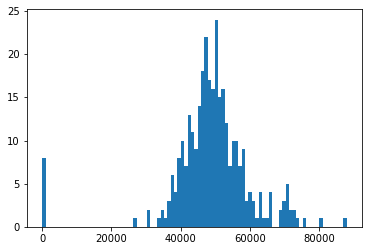

In [78]:
from matplotlib import pyplot as plt
plt.hist(data2, bins=90)
plt.show()

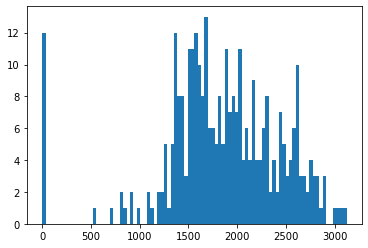

In [79]:
from matplotlib import pyplot as plt
plt.hist(data3, bins=90)
plt.show()

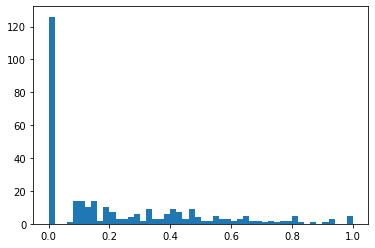

In [65]:
from matplotlib import pyplot as plt
plt.hist(data1, bins=50)
plt.show()